# Introdução

Esse relatório, elaborado para o trabalho final da disciplina Algebra Linear (FGV - EMAp), tem como objetivo discutir e analisar o tópico de deformações e morfismos, uma aplicação da matéria na área de computação gráfica. 

O morfismo é uma técnica cujo objetivo, a princípio,  é fazer transições suaves entre uma imagem inicial e uma final. A transformação dessas imagens é feita através de deformações, processo que consiste em distorcer várias partes da imagem de maneiras distintas. No exemplo abaixo a imagem inicial e a final foram deformadas, produzindo um morfismo que demostra o envelhecimento do homem.
No contexto  de morfismo por deformação, existem algumas ramificações, das quais se destacam o Multilevel free-form deformation (MFFD) e a Malha Deformável. Iremos apresentar o a deformação por malhas deformáveis. 
(add legenda: Exemplo de morfismo retirado de ParallelMorphing - TCC  - Gustavo Frizzo )


 
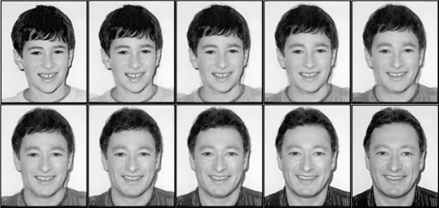

 A aplicação desse tema pode ser encontrada no cinema, no meio científico e em busca de pessoas desaparecidas, por exemplo, como exemplificaremos adiante.

# Desenvolvimento

## Transformações lineares

## Combinações convexas 

## Transformação Afim


## Função densidade


## Triangulação 

Para distorcer cada região da imagem de maneira distinta, é necessário limitar as áreas a serem modificadas. Essa etapa da deformação consiste na triangulação. Inicialmente, são escolhidos pontos de vértices em partes essenciais da imagem, depois, são traçados seguimentos de retas entre eles, determinando regiões triangulares. Esses segmentos são traçados cumprindo as seguintes condições: 

1. Os segmentos formam os lados de uma coleção de triângulos 
2. Os segmentos não se cruzam 
3. A coleção de triângulos é máxima (ou seja, cada ponto de vértice pertence a pelo menos um triângulo)
4. A união dos triângulos é o retângulo ( implica que cada “canto” da imagem possua um vértice)


Note que a triangulação não é única, porém o número m de triângulos formados por um conjunto de n vértices pode ser dado por:

$M = 2n -2 – k$, em que k são os vértices na fronteira do retângulo 

Um método bastante utilizado de triangulação é o de Delaunay, cuja explicação foge do objetivo desse trabalho. 

Em seguida, a deformação é realizada através do movimento dos n pontos $ {v1...vn} $ para novas posições $ {w1...wn} $, que formam uma nova triangulação. 

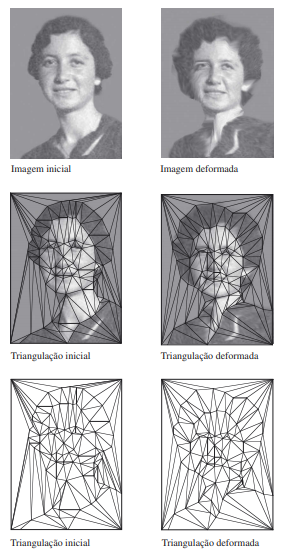

(legenda: Exemplo de triangulação (Algebra Linear com Aplicações - Edi Rorres)

## Defromações

As deformação dependentes do tempo são gerada quando os pontos de vértice iniciais são deformados continuamente no intervalo de tempo $t [0,1]$ até suas posições finais ${w1...w2}$ especificadas, em $t=1$, gerando uma espécie de animação.  
O movimento dos vértices é descrito por:

$ui (t) = (1-t)vi + twi$ ;  em que vi é o vértice inicial e wi o final. 

Note que $ui$ é uma combinação convexa de $vi$ e $wi$ para cada instante $t$. 
A imagem representa o movimento dos vértices dependente do tempo.


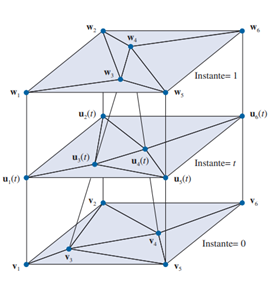

## Morfismos

 Para aplicar o morfismo, consideramos uma imagem inicial e outra final. Aplica-se a uma deformação de t [0,1] em que a imagem inicial é deformada para a final. De forma semelhante, a imagem final é deformada para a inicial. Finalmente, gera-se o morfismo aplicando-se uma média ponderada dos níveis de cinza das duas imagens dentro de cada região deformada. 
Esse último processo determina, de uma maneira geral, a diferença entre deformação e morfismo. As imagens abaixo ilustram essa diferença, em que a primeira representa uma deformação e a segunda um morfismo:

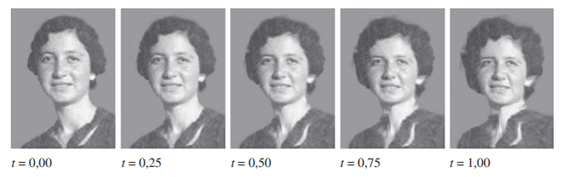

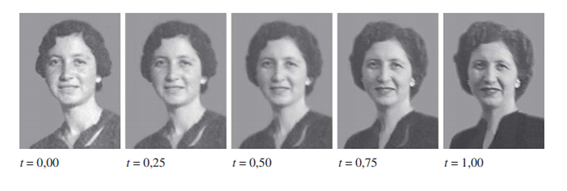

Detalharemos, matematicamente, o processo do morfismo: 

In [16]:
#alguns testes não completos:

In [15]:
from PIL import Image
from numpy import asarray

In [12]:
#carregando a imagem
gato = Image.open('gato.jpg')
cachorro = Image.open('cachorro.jpg')
leao = Image.open('leao.jpg')

#transforma a imagem em uma matriz
gato = asarray(gato)
leao = asarray(leao)

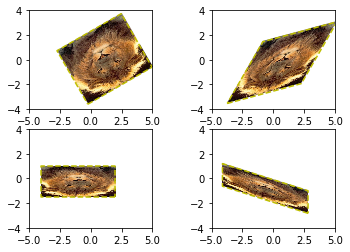

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = leao

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()

In [17]:
c = gato - leao

image2 = Image.fromarray(c)
image2.save('nova.jpg')

In [19]:
c = leao - gato
c = c*0.5
c = gato + c
c
#image2 = Image.fromarray(c)
#PIL.Image.eval(image, *args)
#image2.save('nova.jpg')


#image2 = Image.fromarray(c)
#image2.save('nova.jpg')


array([[[50. , 46. , 40.5],
        [42. , 38. , 32.5],
        [31.5, 26.5, 21.5],
        ...,
        [29.5, 13. ,  9.5],
        [31.5, 15. , 11.5],
        [32.5, 16. , 12. ]],

       [[43. , 39. , 33.5],
        [39. , 35. , 29.5],
        [32. , 27. , 22. ],
        ...,
        [25. ,  9.5,  5.5],
        [28. , 12.5,  8.5],
        [29.5, 14. , 10. ]],

       [[36.5, 31.5, 26.5],
        [32. , 27. , 22. ],
        [24.5, 19.5, 14.5],
        ...,
        [21. ,  6.5,  3.5],
        [25. , 10.5,  7.5],
        [27. , 12.5,  9.5]],

       ...,

       [[66. , 69.5, 59.5],
        [68.5, 72. , 62. ],
        [71. , 73. , 63.5],
        ...,
        [82. , 79. , 58.5],
        [83.5, 80.5, 60. ],
        [83. , 80. , 59.5]],

       [[68.5, 72. , 62. ],
        [69. , 72.5, 62.5],
        [70.5, 74. , 64. ],
        ...,
        [83. , 80. , 59.5],
        [83. , 80. , 59.5],
        [82. , 79. , 58.5]],

       [[72. , 76.5, 66. ],
        [71.5, 75. , 65. ],
        [70.5, 7